# How to find $\pi$ with Data Mining

Archimedes has measured the volume of many containers, as well as two features of the containers. He asks us to find the formula that calculates the volume from the two features. he promises us also, that we will find the magic number *pi*.

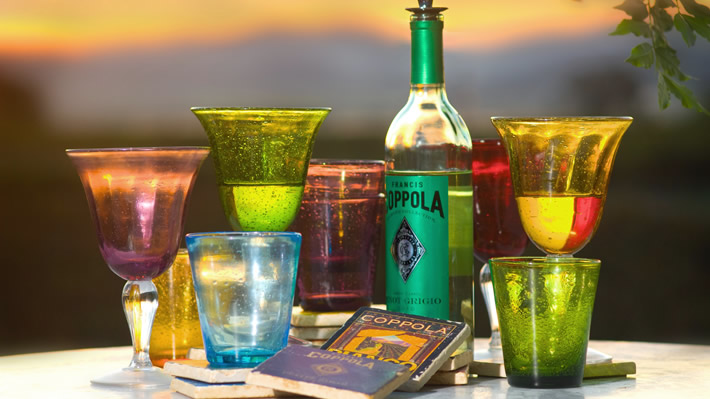

In this notebook, we load a dataset with volumes of certain containers and two features.

We do not have any information about the type of objects -- only that we want to infer the volume from the columns `a` and `b`. This will allow us to understand what we are looking at. As a byproduct, we will "discover" *pi*.

We will not use any cross validation here, but simply plot the output of the model to compare visually.

## We will learn...
- how to create feature interactions
- how to create regularized linear models
- how to find *pi* :)

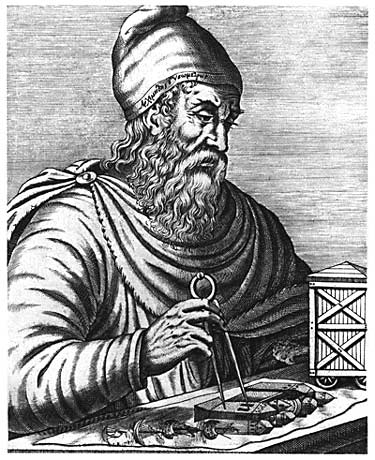

# Load the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pickle
df = pd.read_pickle('../data/archimedes.pickle')
df.sample(10)

,volume,a,b
3986,15.235868,3.099849,0.482595
9593,1394.587206,7.611312,7.661189
570,608.663567,7.601327,3.351452
9300,462.181259,8.400024,2.086239
2004,73.263071,5.738868,0.705281
7293,9.523145,5.686237,0.094151
7372,89.954394,2.040667,6.885326
8997,14.761594,3.514257,0.424695
7771,157.926725,3.563790,3.934163
3575,12.870294,0.664538,9.207672


We want to predict the volume from `a` and `b`.

Let's try a simple linear regression on the data.

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False)
x = df[['a', 'b']]
y = df['volume']
lr.fit(x, y)
lr.coef_

array([ 90.50631875,  36.12103238])

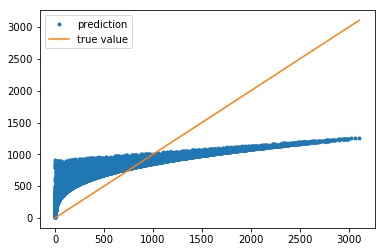

In [20]:
plt.plot(y, lr.predict(x), '.', label='prediction')
plt.plot([0,max(y)], [0,max(y)], '-', label='true value')
plt.legend();

The graph above shows predictions vs. true values. The line shows the perfect model.

This does not look very promising. We need advice from the experts:

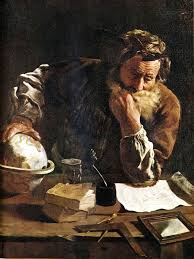

"To calculate the volumes you need to consider non-linear interactions between the features. Then, you will find a magic number that leads you to the volume."

# Polynomial Features

The `PolynomialFeatures` transformer can either compute polynomials of degree `d` on each feature, or products of features.

For polynomials on features `a` and `b` of degree 2 we would get the following new features:

- $a^0 * b^0$
- $a^0 * b^1$
- $a^1 * b^0$
- $a^1 * b^1$
- $a^2 * b^0$
- $a^0 * b^2$

I.e., the sum of powers is always $\leq$ *degree*.

Here's an example:

In [29]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)  # compute polynomials up to degree 2
pfx = pf.fit_transform(x)
powers = ['a^{} * b^{}'.format(x[0], x[1]) for x in pf.powers_]
pd.DataFrame(pfx, columns=powers).sample(10)

,a^0 * b^0,a^1 * b^0,a^0 * b^1,a^2 * b^0,a^1 * b^1,a^0 * b^2
4512,1.0,4.741313,7.328689,22.480053,34.747614,53.709688
2739,1.0,4.841747,1.591055,23.442512,7.703484,2.531455
646,1.0,8.497227,5.222406,72.202863,44.375969,27.273525
4412,1.0,2.017375,0.016257,4.069800,0.032796,0.000264
6026,1.0,9.050924,2.764878,81.919226,25.024704,7.644552
7822,1.0,5.087549,3.029194,25.883154,15.411174,9.176019
6591,1.0,3.185529,5.732163,10.147594,18.259971,32.857694
2441,1.0,3.321052,8.893167,11.029383,29.534666,79.088419
5499,1.0,6.625960,9.827663,43.903345,65.117699,96.582954
6959,1.0,9.279947,5.872189,86.117425,54.493608,34.482607


The `powers_` attribute shows us the powers of the $n$-th attribute in the $n$-th row:

In [30]:
pd.DataFrame(pf.powers_)

,0,1
0,0,0
1,1,0
2,0,1
3,2,0
4,1,1
5,0,2


The above means, that e.g., the last feature has been calculated as $a^0 * b^2$, the one before as $a^1 * b^1$ etc.

# Exercise

Use the polynomial features transformer and linear regression to:
- predict the volume from `a` and `b`
- find *pi* on the way
- derive the formula for computing the volume in human-readable form. Do you know which object has such a definition of the volume?


*Hints:*
- you may need higher degrees
- use a pipeline to combine modeling and preprocessing
- once you have found a working linear model, derive the formula for the volume by inspecting the model and using the `powers_` attribute of the polynomial features transformer to map it back to the original attributes.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# your code here...


In [8]:
#
# Solution below
#
#
#
#
# 
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#             ###
#             ###
#             ###
#           #######
#            #####
#             ###
#              #
# 
#
#
#

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
pf = PolynomialFeatures(degree=3, interaction_only=False)  # compute polynomials up to degree 3
pfx = pf.fit_transform(x)

Let's try again on the transformed features...

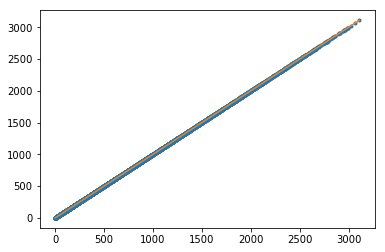

In [34]:
lr.fit(pfx, y)
plt.plot(y, lr.predict(pfx), '.')
plt.plot([0,max(y)], [0,max(y)], '-');

The predictions now look perfect. And the coefficients?

In [11]:
lr.coef_

array([ -1.99786510e-02,  -1.79905722e-02,   2.80972658e-02,
         7.55069786e-03,  -2.91592524e-03,  -3.99983284e-03,
        -6.07640532e-04,   3.14161200e+00,   2.64080676e-04,
         1.43940781e-04])

Most coefficients apart from one are very low, so we can ignore them. The remaining one is $3.1416...$. **This is *pi*! **(approximately).

Now let's look at the formula. First, the powers:

In [36]:
powers = ['a^{} * b^{}'.format(x[0], x[1]) for x in pf.powers_]
powers

['a^0 * b^0',
 'a^1 * b^0',
 'a^0 * b^1',
 'a^2 * b^0',
 'a^1 * b^1',
 'a^0 * b^2',
 'a^3 * b^0',
 'a^2 * b^1',
 'a^1 * b^2',
 'a^0 * b^3']

The above means, that e.g., the last feature has been calculated as $a^0 * b^3$, the one before as $a^1 * b^2$ etc.

Let's zip it with the coefficients for convenience:

In [37]:
list(zip(powers, lr.coef_))

[('a^0 * b^0', -0.019978650963413901),
 ('a^1 * b^0', -0.017990572186786565),
 ('a^0 * b^1', 0.02809726582700494),
 ('a^2 * b^0', 0.0075506978567144566),
 ('a^1 * b^1', -0.0029159252405631321),
 ('a^0 * b^2', -0.0039998328422242114),
 ('a^3 * b^0', -0.00060764053173697227),
 ('a^2 * b^1', 3.1416120002134931),
 ('a^1 * b^2', 0.00026408067606983762),
 ('a^0 * b^3', 0.00014394078110989303)]

# Final predictor
If we ignore the coefficients with very low values, we get the formula for the final predictor:

$\hat{l}= \pi ab^2$

What is this?

 

             ###
             ###
             ###
           #######
            #####
             ###
              #
 

             ###
             ###
             ###
           #######
            #####
             ###
              #
 

             ###
             ###
             ###
           #######
            #####
             ###
              #


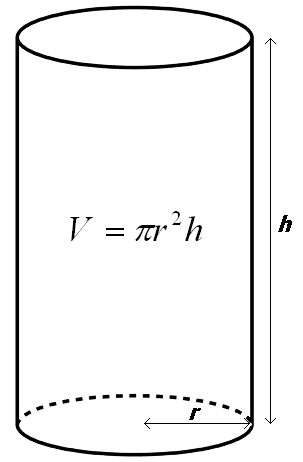

# Lasso

Let's look at the coefficients again:

In [14]:
lr.coef_

array([ -1.99786510e-02,  -1.79905722e-02,   2.80972658e-02,
         7.55069786e-03,  -2.91592524e-03,  -3.99983284e-03,
        -6.07640532e-04,   3.14161200e+00,   2.64080676e-04,
         1.43940781e-04])

*Anything wrong with them?*

Many are very low, but not zero. This adds unneccessary complexity to the model. Meet Lasso:

*Lasso Regression* prefers solutions where the coefficients are small. The higher the `alpha` parameter, the smaller the coefficients in general.

Here's the optimization criterion:

${\displaystyle \min _{\beta \in \mathbb {R} ^{p}}\left\{{\frac {1}{N}}\left\|y-X\beta \right\|_{2}^{2}+\alpha \|\beta \|_{1}\right\}}$

$\beta$ are the coefficients, $X$ the features.
So basically we minimize the squared error while adding a penalty for high coefficients.

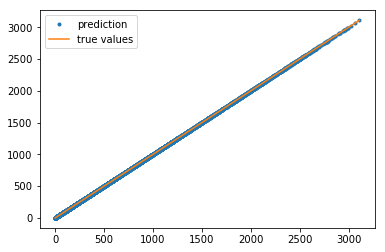

In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(pfx, y)
plt.plot(y, lasso.predict(pfx), '.', label='prediction')
plt.plot([0,max(y)], [0,max(y)], '-', label='true values')
plt.legend();

This looks perfect. And the coefficients?

In [47]:
lasso.coef_

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.27271066e-05,   3.14148617e+00,   3.85037269e-05,
         0.00000000e+00])

All coefficients but one are 0 -- also perfect!
One coefficient is 3.141486... -- even closer to *pi*!

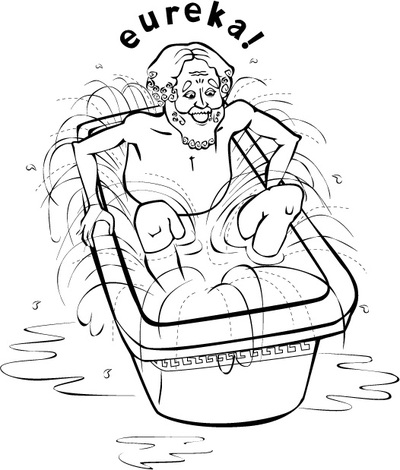